## Observations and Insights 

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
study_df.head()
# print(study_df.dtypes)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [140]:
# Checking the number of mice.
number = study_df["Mouse ID"]
number.count()

1893

In [141]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
finding_dup = study_df[["Mouse ID", "Timepoint"]]
dup_data = finding_dup[finding_dup.duplicated("Mouse ID")]

In [142]:
# Optional: Get all the data for the duplicate mouse ID. 
all_data = study_df[study_df.duplicated("Mouse ID")]

In [143]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
all_data = study_df.drop_duplicates("Mouse ID")

In [144]:
# Checking the number of mice in the clean DataFrame.
all_data["Mouse ID"].count()

249

## Summary Statistics

In [145]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
study_df[["Drug Regimen", "Tumor Volume (mm3)"]].head()
tvol_summary = study_df.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
tvol_summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [146]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_data = study_df.set_index("Drug Regimen")
regimen_data = summary_data.groupby("Drug Regimen")
tvolume = regimen_data["Tumor Volume (mm3)"]
mean_tv = tvolume.mean()
median_tv = tvolume.median()
var_tv = tvolume.var()
stdev_tv = tvolume.std()
sem_tv = tvolume.sem()
# This method produces everything in a single groupby function
tumor_volume = pd.DataFrame({"Mean Tumor Volume": mean_tv, "Median Tumor Volume": median_tv, "Tumor Volume Variance": var_tv, "Tumor Volume St. Dev.": stdev_tv, "Tumor Volume Std. Err": sem_tv})
tumor_volume

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume St. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

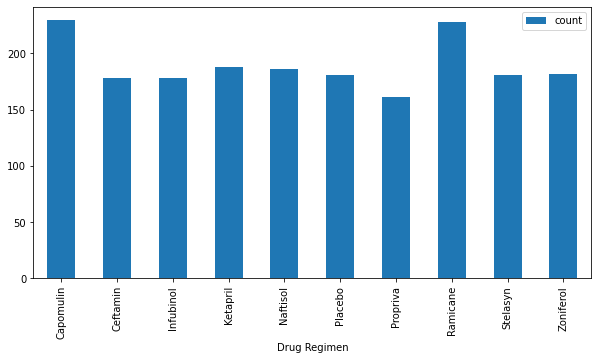

In [147]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
tvol_summary = study_df.groupby("Drug Regimen").agg(["count"])["Mouse ID"]
tvol_plot = tvol_summary.plot(kind="bar", figsize=(10,5))

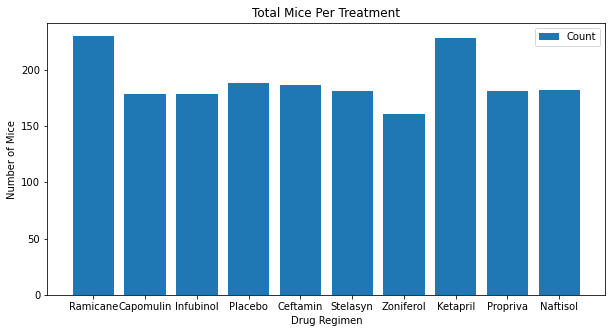

In [148]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
summary_data = study_df["Drug Regimen"]
drug_regimen = summary_data.drop_duplicates()
mouse_summary = study_df.set_index("Drug Regimen")
regimen_data = mouse_summary.groupby("Drug Regimen")
mouse = regimen_data["Mouse ID"]
m_count = mouse.count()

x_axis = drug_regimen
y_axis = m_count
plt.figure(figsize=(10,5))
plt.bar(x_axis, y_axis, label="Count")
plt.title("Total Mice Per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend(loc="best")

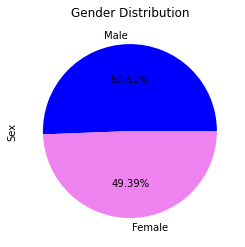

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = study_df["Sex"].value_counts()
gender_pie = gender.plot.pie(y=gender, autopct="%.2f%%", colors=['blue', 'violet'], title="Gender Distribution")



Text(0.5, 1.0, 'Gender Distribution')

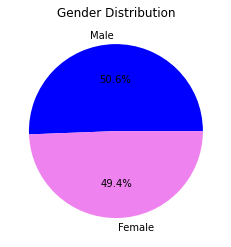

In [150]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = study_df["Sex"].value_counts()
labels = ["Male", "Female"]
colors = ["blue", "violet"]
plt.pie(gender, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Gender Distribution")


## Quartiles, Outliers and Boxplots

In [151]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_reg = study_df[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)", "Timepoint"]]
four_reg = four_reg[four_reg["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
four_reg = four_reg.sort_values(["Drug Regimen"])
four_reg

# Start by getting the last (greatest) timepoint for each mouse
mouse = four_reg.groupby("Mouse ID")
final_vol = mouse["Timepoint"].max()
final_vol

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(final_vol, four_reg)

In [168]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
for drug in treatment_list:
    data = merge_df.loc[merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(data)

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers = data.loc[(data < lower_bound) | (data > upper_bound)]
print(f"{drug}'s potential outliers: {outliers}")
    

Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\shelt\anaconda3\envs\pythonData\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


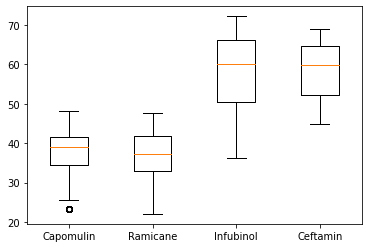

In [158]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(tumor_vol_data, labels=treatment_list)
plt.show()

## Line and Scatter Plots

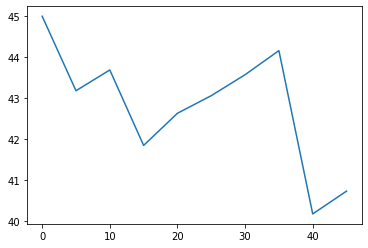

In [138]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
find_mouse = merge_df[merge_df["Mouse ID"].isin(["s710"])]
sorted_mouse = find_mouse.sort_values("Timepoint", ascending=False)
x_axis = sorted_mouse["Timepoint"]
y_axis = sorted_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

Text(0.5, 1.0, 'Capumolin Treatment: Mouse Weight vs. Tumor Volume')

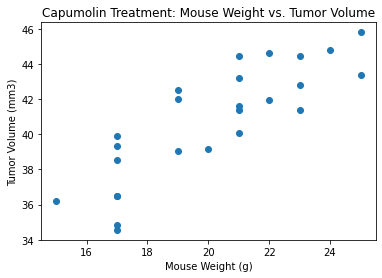

In [112]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capumolin = study_df[study_df["Drug Regimen"].isin(["Capomulin"])]
capumolin_df = capumolin[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]
avg_vol = capumolin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capumolin_df.groupby("Mouse ID")["Weight (g)"].mean()

plt.scatter(mouse_weight, avg_vol)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capumolin Treatment: Mouse Weight vs. Tumor Volume")

## Correlation and Regression

Text(0.5, 1.0, 'Capumolin Treatment: Mouse Weight vs. Tumor Volume')

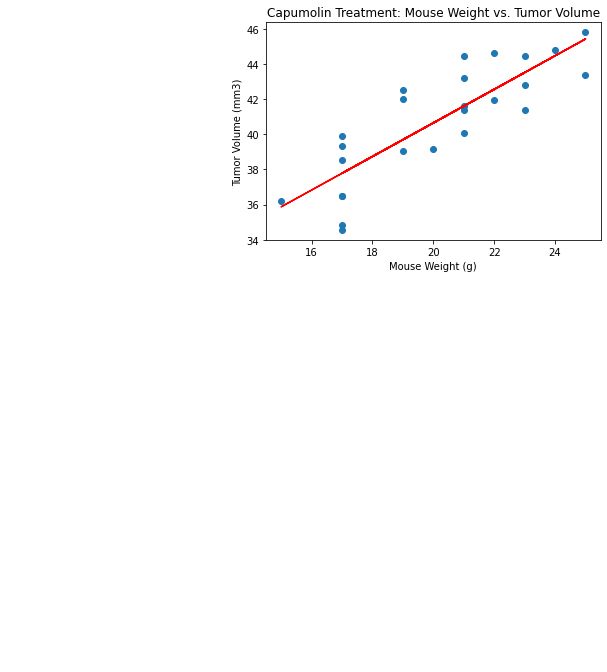

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
avg_vol = capumolin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capumolin_df.groupby("Mouse ID")["Weight (g)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_weight, avg_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, avg_vol,)
plt.plot(mouse_weight, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capumolin Treatment: Mouse Weight vs. Tumor Volume")